# Do students describe professors differently based on gender? (RateMyProfessors.com)

In [ ]:
#In this set of codes, I wanted to see how students review professors. 
#If students review male/female professors differently
#Can't remember were I got this dataset from but its a fairly large dataset

In [ ]:
from urllib.request import urlopen
from lxml import etree
import time
import pandas as pd
import os
import numpy as np
import nltk 
from nltk.tokenize import word_tokenize 
from nltk.stem.porter import PorterStemmer 
from nltk.tokenize import WhitespaceTokenizer 
from sklearn.feature_extraction import text as sklearn_text 
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.model_selection import GridSearchCV
from wordcloud import WordCloud
import re
import seaborn as sns

nltk.download('punkt')
sns.set(style='white')
nltk.download('vader_lexicon')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
folder_path = '/work/data2'
concatenated_data = pd.DataFrame()

for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(folder_path, filename)
        data = pd.read_csv(file_path)
        concatenated_data = pd.concat([concatenated_data, data], ignore_index=True)

concatenated_data.columns = ['professor_name', 'school_name', 'department_name', 'local_name', 'state_name', 'year_since_first_review', 'star_rating', 'take_again', 'diff-index', 'tag_professor', 'num_student', 'post_date', 'name_onlines', 'student_star', 'student_difficult', 'attence', 'for_credit', 'would_take_agains', 'grades', 'stu_tags', 'help_useful', 'help_not_useful', 'comments']
concatenated_data.to_csv('concatenated_data.csv', index=False)


In [ ]:
df = pd.read_csv("/work/concatenated_data.csv")

In [ ]:
df

,professor_name,school_name,department_name,local_name,state_name,year_since_first_review,star_rating,take_again,diff-index,tag_professor,...,student_star,student_difficult,attence,for_credit,would_take_agains,grades,stu_tags,help_useful,help_not_useful,comments
0,Elizabeth Cheadle,University of California Los Angeles (UCLA),Law department,Los Angeles,CA,0.0,1.5,NaN,5.0,NaN,...,1.5,5.0,NaN,NaN,NaN,NaN,NaN,1,0,Could really care less about students. Is more...
1,Jeremy Mullins,Savannah College of Art and Design,Art & Design department,Savannah,GA,0.0,4.5,NaN,4.0,NaN,...,4.5,4.0,NaN,NaN,NaN,NaN,NaN,0,0,Great and hilarious guy. There will be no clas...
2,Jeremy Mullins,Savannah College of Art and Design,Art & Design department,Savannah,GA,0.0,4.5,NaN,4.0,NaN,...,4.5,4.0,NaN,NaN,NaN,NaN,NaN,0,1,Mullins is alot of fun. He will work you to de...
3,Joann Siebe,Portland State University,Marketing department,Portland,OR,0.0,4.8,NaN,1.5,NaN,...,5.0,1.0,NaN,NaN,NaN,NaN,NaN,0,0,Great teacher. I wish she was a little more st...
4,Joann Siebe,Portland State University,Marketing department,Portland,OR,0.0,4.8,NaN,1.5,NaN,...,4.5,2.0,NaN,NaN,NaN,NaN,NaN,0,0,The class was a bit boring at first but it got...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19631,Robert Bartlett,Eastern Washington University,History department,Cheney,WA,3.0,4.6,89%,1.3,Caring (10) Respected (10) Inspirational (9)...,...,3.5,1.0,NaN,Yes,NaN,NaN,NaN,2,0,I was really looking forward to taking this cl...
19632,Robert Bartlett,Eastern Washington University,History department,Cheney,WA,3.0,4.6,89%,1.3,Caring (10) Respected (10) Inspirational (9)...,...,5.0,1.0,Mandatory,Yes,NaN,A+,RESPECTED INSPIRATIONAL CARING,2,0,Amazing and inspirational teacher. Truly cares...
19633,Robert Bartlett,Eastern Washington University,History department,Cheney,WA,3.0,4.6,89%,1.3,Caring (10) Respected (10) Inspirational (9)...,...,4.0,1.0,Mandatory,Yes,NaN,A+,RESPECTED PARTICIPATION MATTERS INSPIRATIONAL,0,0,"Easy class, even though it makes you think. He..."
19634,Isaac Sullivan,Naval Academy Preparatory School,Physics department,Newport,RI,1.0,4.3,NaN,3.5,NaN,...,4.5,4.0,NaN,NaN,NaN,NaN,NaN,0,0,Great Prof. Very helpful for EI and whenever y...


# Setting pronouns 

In [ ]:

female_pronouns = ['she', 'her', 'herself', 'shes', 'hers', 'lady']
male_pronouns = ['him', 'he', 'his', 'himself']

gender_labels = []

for index, row in df.iterrows():
    comments = row['comments']
    
    if isinstance(comments, str):
        female_count = 0
        male_count = 0
        for pronoun in female_pronouns:
            female_count += comments.count(pronoun)
        for pronoun in male_pronouns:
            male_count += comments.count(pronoun)

        if female_count > 5:
            gender_labels.append('F')
        elif male_count > 5:
            gender_labels.append('M')
        else:
            gender_labels.append('Unknown')
    else:
        gender_labels.append('Unknown')

df['gender'] = gender_labels


In [ ]:
df 

,professor_name,school_name,department_name,local_name,state_name,year_since_first_review,star_rating,take_again,diff-index,tag_professor,...,student_difficult,attence,for_credit,would_take_agains,grades,stu_tags,help_useful,help_not_useful,comments,gender
0,Elizabeth Cheadle,University of California Los Angeles (UCLA),Law department,Los Angeles,CA,0.0,1.5,NaN,5.0,NaN,...,5.0,NaN,NaN,NaN,NaN,NaN,1,0,Could really care less about students. Is more...,M
1,Jeremy Mullins,Savannah College of Art and Design,Art & Design department,Savannah,GA,0.0,4.5,NaN,4.0,NaN,...,4.0,NaN,NaN,NaN,NaN,NaN,0,0,Great and hilarious guy. There will be no clas...,M
2,Jeremy Mullins,Savannah College of Art and Design,Art & Design department,Savannah,GA,0.0,4.5,NaN,4.0,NaN,...,4.0,NaN,NaN,NaN,NaN,NaN,0,1,Mullins is alot of fun. He will work you to de...,M
3,Joann Siebe,Portland State University,Marketing department,Portland,OR,0.0,4.8,NaN,1.5,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,0,0,Great teacher. I wish she was a little more st...,M
4,Joann Siebe,Portland State University,Marketing department,Portland,OR,0.0,4.8,NaN,1.5,NaN,...,2.0,NaN,NaN,NaN,NaN,NaN,0,0,The class was a bit boring at first but it got...,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19631,Robert Bartlett,Eastern Washington University,History department,Cheney,WA,3.0,4.6,89%,1.3,Caring (10) Respected (10) Inspirational (9)...,...,1.0,NaN,Yes,NaN,NaN,NaN,2,0,I was really looking forward to taking this cl...,Unknown
19632,Robert Bartlett,Eastern Washington University,History department,Cheney,WA,3.0,4.6,89%,1.3,Caring (10) Respected (10) Inspirational (9)...,...,1.0,Mandatory,Yes,NaN,A+,RESPECTED INSPIRATIONAL CARING,2,0,Amazing and inspirational teacher. Truly cares...,Unknown
19633,Robert Bartlett,Eastern Washington University,History department,Cheney,WA,3.0,4.6,89%,1.3,Caring (10) Respected (10) Inspirational (9)...,...,1.0,Mandatory,Yes,NaN,A+,RESPECTED PARTICIPATION MATTERS INSPIRATIONAL,0,0,"Easy class, even though it makes you think. He...",Unknown
19634,Isaac Sullivan,Naval Academy Preparatory School,Physics department,Newport,RI,1.0,4.3,NaN,3.5,NaN,...,4.0,NaN,NaN,NaN,NaN,NaN,0,0,Great Prof. Very helpful for EI and whenever y...,Unknown


In [ ]:
#removed factors that weren't relative to this project

In [ ]:
df = df.drop(['year_since_first_review', 'state_name', 'local_name', 'take_again', "diff-index", "post_date", "stu_tags", "help_useful", "help_not_useful", "tag_professor" ], axis = 1)


In [ ]:
df

,professor_name,school_name,department_name,star_rating,num_student,name_onlines,student_star,student_difficult,attence,for_credit,would_take_agains,grades,comments,gender
0,Elizabeth Cheadle,University of California Los Angeles (UCLA),Law department,1.5,1,IP1,1.5,5.0,NaN,NaN,NaN,NaN,Could really care less about students. Is more...,M
1,Jeremy Mullins,Savannah College of Art and Design,Art & Design department,4.5,2,SEQA100,4.5,4.0,NaN,NaN,NaN,NaN,Great and hilarious guy. There will be no clas...,M
2,Jeremy Mullins,Savannah College of Art and Design,Art & Design department,4.5,2,SEQAINTR,4.5,4.0,NaN,NaN,NaN,NaN,Mullins is alot of fun. He will work you to de...,M
3,Joann Siebe,Portland State University,Marketing department,4.8,2,UNST421,5.0,1.0,NaN,NaN,NaN,NaN,Great teacher. I wish she was a little more st...,M
4,Joann Siebe,Portland State University,Marketing department,4.8,2,UNST471,4.5,2.0,NaN,NaN,NaN,NaN,The class was a bit boring at first but it got...,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19631,Robert Bartlett,Eastern Washington University,History department,4.6,49,SOCI10102,3.5,1.0,NaN,Yes,NaN,NaN,I was really looking forward to taking this cl...,Unknown
19632,Robert Bartlett,Eastern Washington University,History department,4.6,49,SOC101,5.0,1.0,Mandatory,Yes,NaN,A+,Amazing and inspirational teacher. Truly cares...,Unknown
19633,Robert Bartlett,Eastern Washington University,History department,4.6,49,SOC263,4.0,1.0,Mandatory,Yes,NaN,A+,"Easy class, even though it makes you think. He...",Unknown
19634,Isaac Sullivan,Naval Academy Preparatory School,Physics department,4.3,2,PH15,4.5,4.0,NaN,NaN,NaN,NaN,Great Prof. Very helpful for EI and whenever y...,Unknown


In [ ]:
df = df[df['gender'] != 'Unknown']

In [ ]:
df = df.drop(['attence', 'for_credit', 'would_take_agains', 'grades', 'name_onlines', 'num_student', 'student_difficult', 'school_name'], axis = 1)


In [ ]:
df

,professor_name,department_name,star_rating,student_star,comments,gender
0,Elizabeth Cheadle,Law department,1.5,1.5,Could really care less about students. Is more...,M
1,Jeremy Mullins,Art & Design department,4.5,4.5,Great and hilarious guy. There will be no clas...,M
2,Jeremy Mullins,Art & Design department,4.5,4.5,Mullins is alot of fun. He will work you to de...,M
3,Joann Siebe,Marketing department,4.8,5.0,Great teacher. I wish she was a little more st...,M
4,Joann Siebe,Marketing department,4.8,4.5,The class was a bit boring at first but it got...,M
...,...,...,...,...,...,...
19622,Robert Bartlett,History department,4.6,4.0,"He is a great teacher, but I want to warn you ...",M
19624,Robert Bartlett,History department,4.6,5.0,"I only had him for one class, but he is the be...",M
19626,Robert Bartlett,History department,4.6,5.0,Passed this class with a 4.0 WITHOUT the textb...,M
19627,Robert Bartlett,History department,4.6,5.0,He\'s amazing i would recommend him to anyone ...,M


# Defend what words will be considered Negative vs Positive. 

In [ ]:
sia = SentimentIntensityAnalyzer()
sentiment_scores = df['comments'].apply(lambda x: sia.polarity_scores(x))

df['sentiment_score'] = sentiment_scores.apply(lambda x: x['compound'])

df['positive_sentiment'] = (df['sentiment_score'] >= 0.05).astype(int)
df['negative_sentiment'] = (df['sentiment_score'] <= -0.05).astype(int)

df['positive_comments'] = df.apply(lambda x: x['comments'] if x['positive_sentiment'] == 1 else None, axis=1)
df['negative_comments'] = df.apply(lambda x: x['comments'] if x['negative_sentiment'] == 1 else None, axis=1)


m_pos = df.loc[(df['gender'] == 'M') & (df['positive_sentiment'] == 1)]
f_pos = df.loc[(df['gender'] == 'F') & (df['positive_sentiment'] == 1)]
m_neg = df.loc[(df['gender'] == 'M') & (df['negative_sentiment'] == 1)]
f_neg = df.loc[(df['gender'] == 'F') & (df['negative_sentiment'] == 1)]


In [ ]:
stop_words = ['students', 's', 'take', 'on', 'teacher', 'just', "don't", "didn'", 'did', 'sra', 
                'queen', 'but', 'is','for', 'in', 'left', 'to', 'her', 'college', 'a', 'an', 
                'the', 'and', 'it', 'for', 'or', 'my', 'your', 'our', 'and', 'their', 'she', 'her', 
                'he', 'him', 'if', 'of', 'very', 'not', 'you', 'was', 'I', 'that', 'this', 'with', 
                'all', 'have', 'one', 'hi', 'do', 'are', 'what', 'help', 'really', 'will', 'get', 
                'professor', 'has', 'had', 'you', 'need', 'give', 'so', 'his', 'lot', 'does', 'at', 
                'about', 'make', 'know', 'there', 'from', 'because', 'u', 'don t', 'be', "doesn't", 
                'don', 't', 'when', 'doesn', 'would', 'like', 'as', 'want', 'ever', 'even', 'other',
                'no', 'can', 'than', 'never', 'shes', 'out', 'way', 'much', 'us', 'teachers', 'professor',
                'also', 'always', 'hes', 'only', 'go', 'makes', 'as', 'still', 'any', 'think', 'me']

m_comments = ' '.join(m_pos['comments'].tolist())
f_comments = ' '.join(f_pos['comments'].tolist())

vec = TfidfVectorizer(stop_words=stop_words)

m_tfidf = vec.fit_transform([m_comments])
f_tfidf = vec.fit_transform([f_comments])

m_top_words = sorted(zip(vec.get_feature_names(), m_tfidf.toarray()[0]), key=lambda x: x[1], reverse=True)[:10]
f_top_words = sorted(zip(vec.get_feature_names(), f_tfidf.toarray()[0]), key=lambda x: x[1], reverse=True)[:10]


/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:404: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['didn'] not in stop_words.
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
m_wordcloud_pos = WordCloud(stopwords=stop_words, background_color="white").generate(m_comments)
f_wordcloud_pos = WordCloud(stopwords=stop_words, background_color="white").generate(f_comments)

m_wordcloud_neg = WordCloud(stopwords=stop_words, background_color="white").generate(' '.join(m_neg['comments'].tolist()))
f_wordcloud_neg = WordCloud(stopwords=stop_words, background_color="white").generate(' '.join(f_neg['comments'].tolist()))


In [ ]:
#Students seem to review female professor based on how they feel about her 
#While the male professor get reviews mainly based on the class itself 

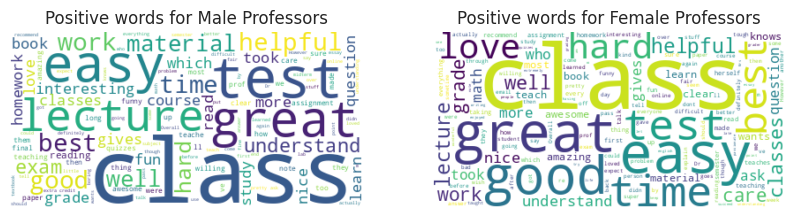

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(m_wordcloud_pos, interpolation='bilinear')
plt.axis("off")
plt.title("Positive words for Male Professors")
plt.subplot(1, 2, 2)
plt.imshow(f_wordcloud_pos, interpolation='bilinear')
plt.axis("off")
plt.title("Positive words for Female Professors")
plt.show()

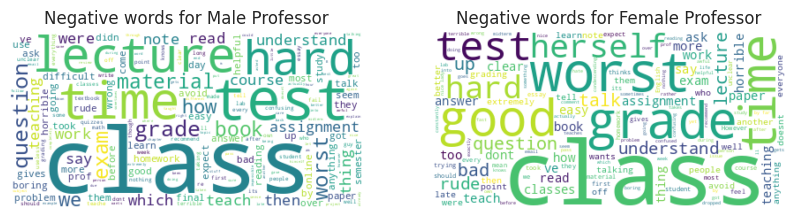

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(m_wordcloud_neg, interpolation='bilinear')
plt.axis("off")
plt.title("Negative words for Male Professor")
plt.subplot(1, 2, 2)
plt.imshow(f_wordcloud_neg, interpolation='bilinear')
plt.axis("off")
plt.title("Negative words for Female Professor")
plt.show()

# Recommendation System on the "Best Professor" Based on each gender.

# Worst Professor in each Department Based on Gender 

In [ ]:
def recommend_professors(department, gender):
    if gender == 'M':
        gender_df = m_neg
        sentiment_col = 'negative_sentiment'
        comment_col = 'negative_comments'
    elif gender == 'F':
        gender_df = f_neg
        sentiment_col = 'negative_sentiment'
        comment_col = 'negative_comments'
    else:
        print("Invalid gender.")
        return

    dept_df = gender_df.loc[(gender_df['department_name'] == department) & 
                        (gender_df['negative_comments'].notna()) & 
                        (gender_df[comment_col] != 'None')]

    if dept_df.empty:
        print("No data for this department and gender.")
        return

    dept_df['sentiment_score'] = dept_df['sentiment_score'].astype(float)

    worst_prof = dept_df.loc[dept_df[sentiment_col] <= 1, 'sentiment_score'].idxmin()

    print(f"For department {department} and gender {gender}:")
    if not worst_prof:
        print("No negative comments for any professor in this department and gender.")
    else:
        print(f"The worst professor is {dept_df.loc[worst_prof, 'professor_name']} with most negative comment: {dept_df.loc[worst_prof, comment_col]}.")


In [ ]:
recommend_professors('Accounting department', 'M')
recommend_professors('Accounting department', 'F')

For department Accounting department and gender M:
The worst professor is Jerome  Li with most negative comment: Mr. Li is hates life so he takes it out on his students. he gets off by failing students. hard teacher. avoid this class! I went into the final passing, which is hard in the first place, then took the final and it was NOTHING like the way he taught accounting because its a department final. so it screwed me.
For department Accounting department and gender F:
The worst professor is Sunita  Goel with most negative comment: DO NOT TAKE! This is the hardest ACCT class by far. It is hard to understand what she is even talking about and sometimes it doesn\'t appear she even knows what she is doing when she erases the board 100x and has to correct it... When the class average is failing she tells us we need to work harder and there is no reason everyone can\'t get a 100..
/tmp/ipykernel_99/1680852736.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

# Best Professors Based on Gender overall

In [ ]:
def recommend_professors(department, gender):
    if gender == 'M':
        gender_df = m_pos
        sentiment_col = 'positive_sentiment'
        comment_col = 'positive_comments'
    elif gender == 'F':
        gender_df = f_pos
        sentiment_col = 'positive_sentiment'
        comment_col = 'positive_comments'
    else:
        return

    dept_df = gender_df.loc[(gender_df['department_name'] == department) & 
                        (gender_df['positive_comments'].notna()) & 
                        (gender_df[comment_col] != 'None')]

    if dept_df.empty:
        print("No data for this department and gender.")
        return

    dept_df['sentiment_score'] = dept_df['sentiment_score'].astype(float)

    best_prof = dept_df.loc[dept_df[sentiment_col] == 1, 'sentiment_score'].idxmax()

    print(f"For department {department} and gender {gender}:")
    print(f"The best professor is {dept_df.loc[best_prof, 'professor_name']} with most positive comment: {dept_df.loc[best_prof, comment_col]}.")


In [ ]:
recommend_professors('Law department', 'M')
recommend_professors('Law department', 'F')

For department Law department and gender M:
The best professor is Adam  Dodek with most positive comment: Nice man but I think he is cunning deep down. Gave great marks on memos and then messed ppl on the exam (maybe to get good course evaluations?) VERY technical. Pleasant to hear if you have an interest in the material. Super great at accomodating extra help to students and giving extra preparation. Cares for students to do well. Awkward in person..
For department Law department and gender F:
The best professor is Angela  Cameron with most positive comment: Prof. Cameron is an awesome professor. She is very clear with her expectations, she has great slides that uploads BEFORE class, she is engaging and truly interested in the success of her students. She is also very approachable so go see her in her office hours! I\'m def taking another course with her! She is also a very fair marker! :).
/tmp/ipykernel_99/2075398379.py:21: SettingWithCopyWarning: 
A value is trying to be set on a c

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=a7322465-653b-4aa2-871a-9a63b0142b4b' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>